In [42]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox

In [43]:
df = pd.read_csv("./data/c1.csv", parse_dates=['Datetime'])
df.sort_values('Datetime', inplace=True)
df.set_index('Datetime', inplace=True)
y = df['Power_Consumption_diff']
y_diff = y.diff().dropna()
y.head()

Datetime
1988-01-01       NaN
1988-02-01   -1.8332
1988-03-01   -8.2218
1988-04-01   -4.9788
1988-05-01   -2.1563
Name: Power_Consumption_diff, dtype: float64

<Figure size 1000x600 with 0 Axes>

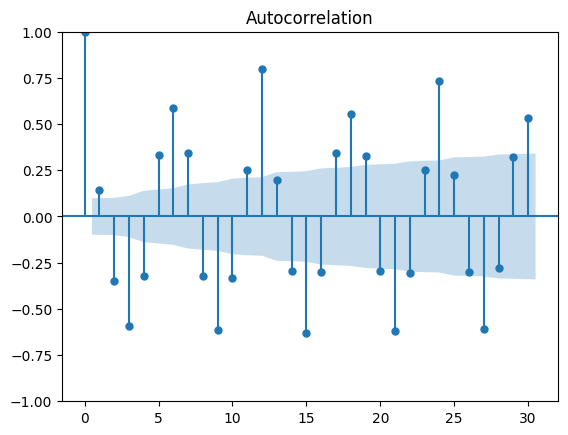

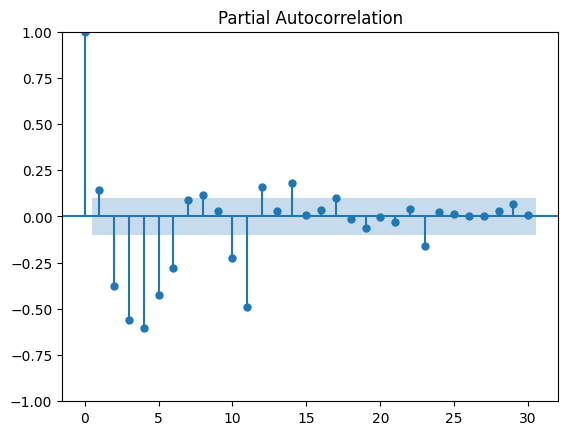

In [44]:
plt.figure(figsize=(10, 6))
plot_acf(y_diff, lags=30, adjusted=False)
plot_pacf(y_diff, lags=30)
plt.show()

In [45]:
train_size = int(len(y) * 0.8)

train = y.iloc[:train_size]
test = y.iloc[train_size:]

In [46]:
model = ARIMA(train, order=(2, 0, 2))
result = model.fit()
print("AIC: ", result.aic)
print("BIC: ", result.bic)

AIC:  1650.7610636322202
BIC:  1673.314474275484


In [47]:
# ljung-Box Test
residuals = result.resid.dropna()
ljung_box = acorr_ljungbox(residuals, lags=[1], return_df=False)

print(ljung_box)

   lb_stat  lb_pvalue
1  3.25934   0.071018


In [48]:
next_steps = len(test)
forecast_value = result.forecast(steps=next_steps)

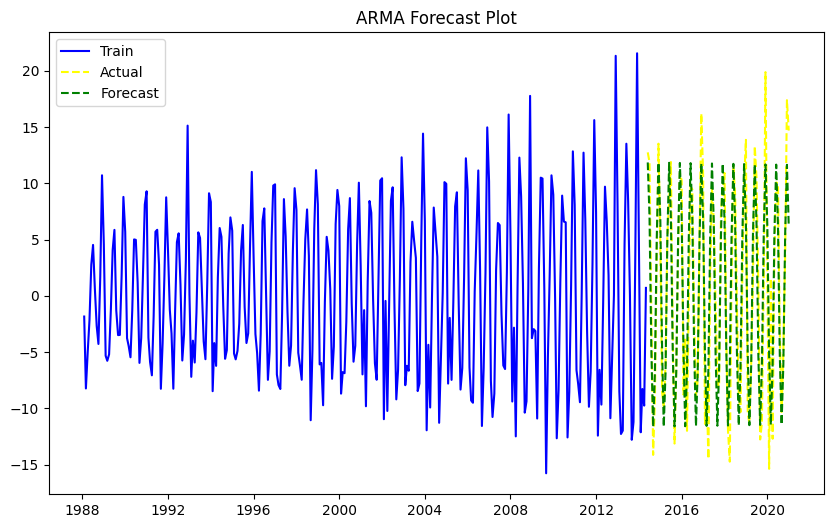

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train', color='blue')
plt.plot(test, label='Actual', color='yellow', linestyle='--')
plt.plot(forecast_value, label='Forecast', color='green', linestyle='--')
plt.title("ARMA Forecast Plot")
plt.legend()
plt.show()

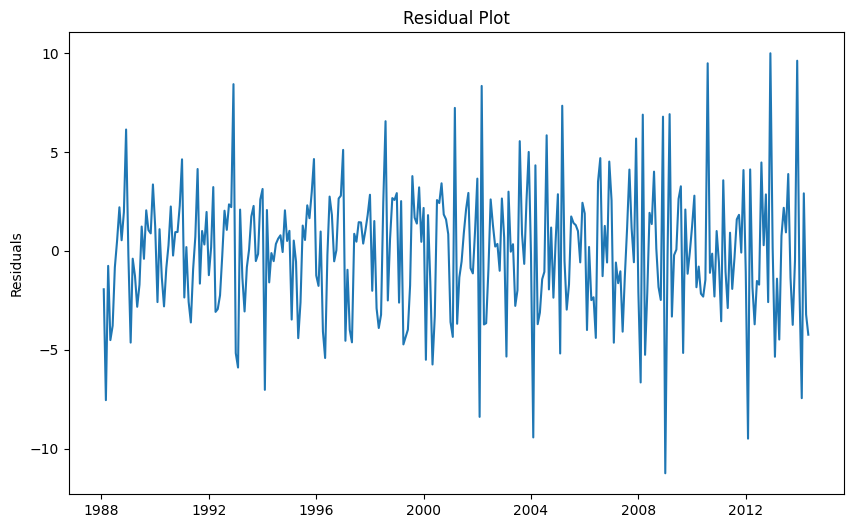

In [50]:
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title("Residual Plot")
plt.ylabel("Residuals")
plt.show()